# Step1: Reading the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_path = '/content/drive/My Drive/fraud/creditcard.csv'

In [3]:
import pandas as pd
data=pd.read_csv(data_path)


In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## step 1.1 Display basic information about the dataset

In [ ]:
import matplotlib.pyplot as plt
data_info = {
    "Head": data.head(),
    "Shape": data.shape,
    "Data Types": data.dtypes,
    "Missing Values": data.isnull().sum(),
    "Duplicate Rows": data.duplicated().sum()
}

data_info

{'Head':    Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V21       V22       V23       V24       V25  \
 0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
 1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
 2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
 3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
 4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
 
         V

## Step 1.2 Determine number of fraud cases in dataset

In [ ]:
data.Class.value_counts()

,count
Class,
0,284315
1,492


## Step 1.3 Plot histograms of each parameter

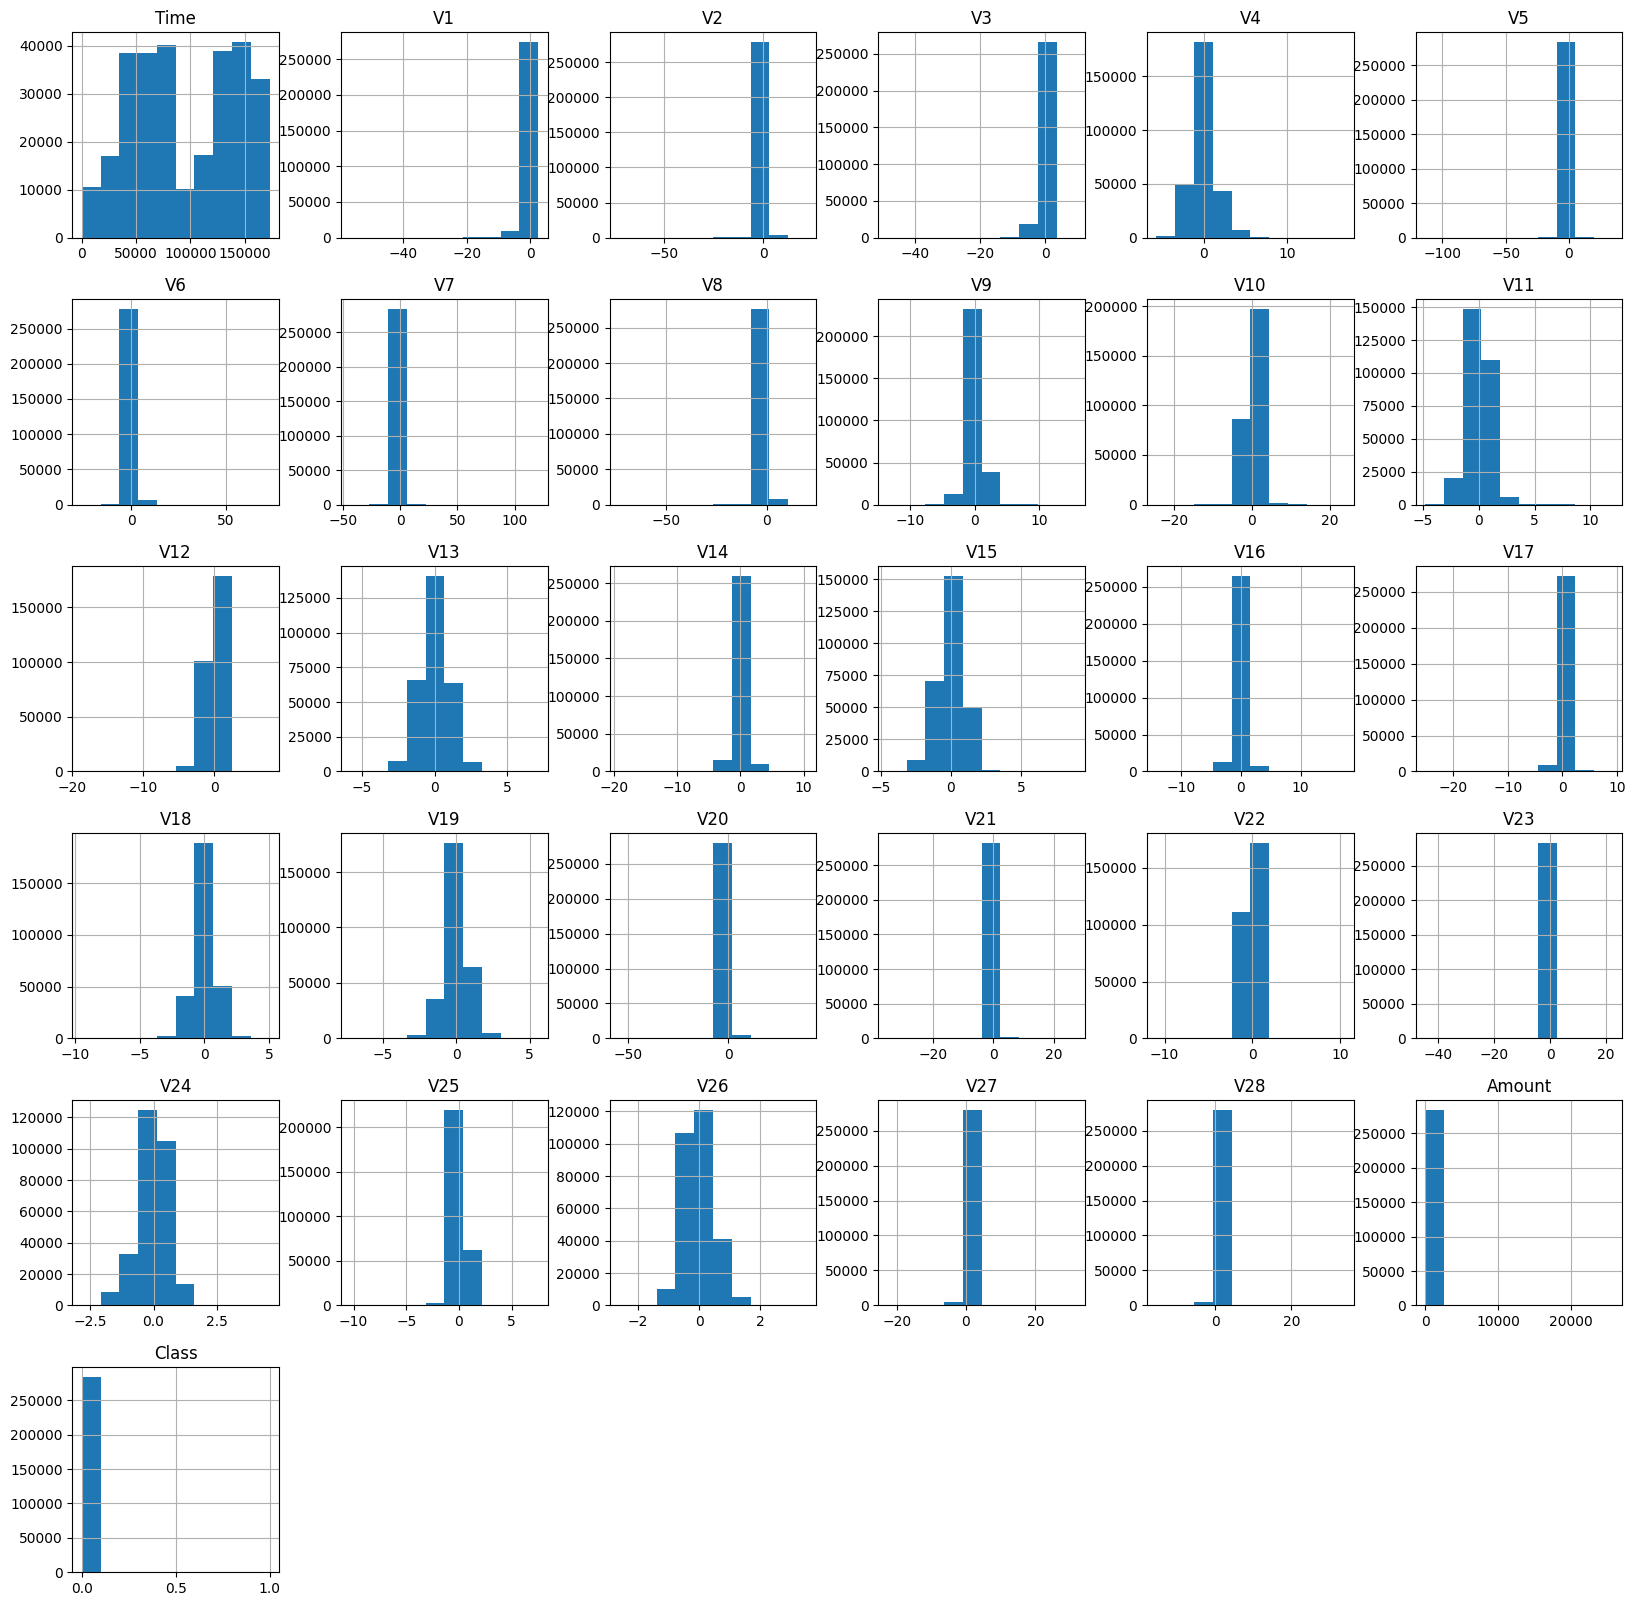

In [ ]:
import matplotlib.pyplot as plt
data.hist(figsize = (20, 20))
plt.show()

## Step 1.4  Correlation matrix

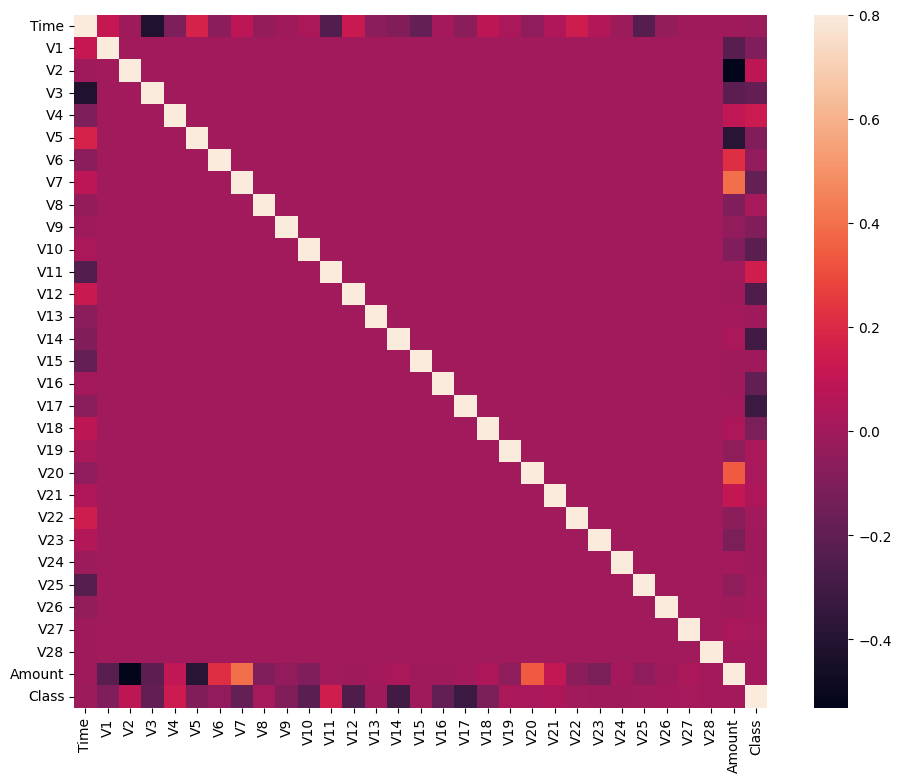

In [ ]:

import seaborn as sns
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [4]:
#compare the values for both transactions
data.groupby('Class').mean()
#mean in all v categories

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Step 2. resampling the data set

## Step 2.1 Scatter plot Fraud vs Valid (resampling valid)

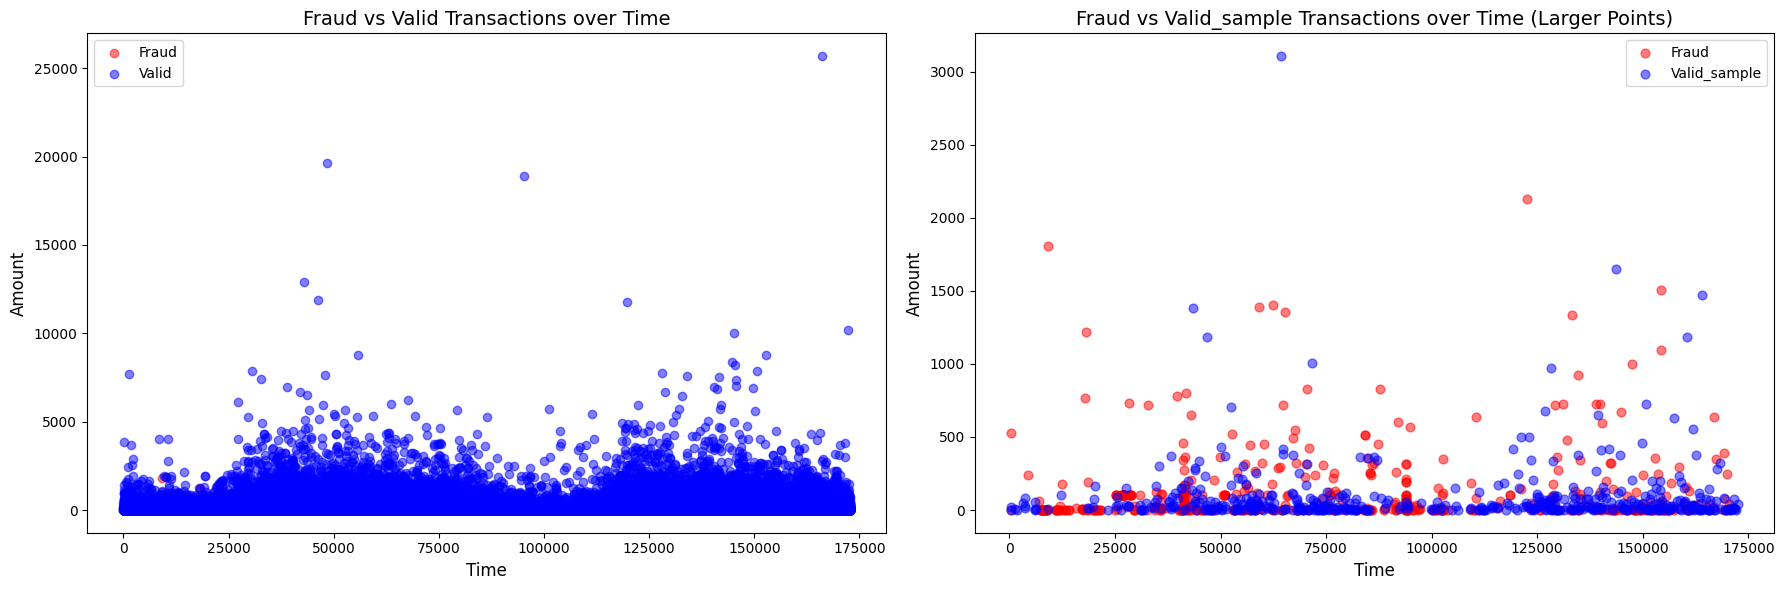

In [11]:
import matplotlib.pyplot as plt

# Assuming 'data' contains the 'Class', 'Time', and 'Amount' columns
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

# Sampling the valid class (for balancing the dataset)
Valid_sample = Valid.sample(n=492)

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Left subplot: Scatter plot for Fraud and Valid using Matplotlib
axes[0].scatter(Fraud['Time'], Fraud['Amount'], color='red', label='Fraud', alpha=0.5)
axes[0].scatter(Valid['Time'], Valid['Amount'], color='blue', label='Valid', alpha=0.5)
axes[0].set_title('Fraud vs Valid Transactions', fontsize=16)
axes[0].set_xlabel('Time', fontsize=14)
axes[0].set_ylabel('Amount', fontsize=14)
axes[0].legend()

# Right subplot: Scatter plot for Fraud and Valid_sample with larger point size
axes[1].scatter(Fraud['Time'], Fraud['Amount'], color='red', label='Fraud', alpha=0.5, s=40)
axes[1].scatter(Valid_sample['Time'], Valid_sample['Amount'], color='blue', label='Valid_sample', alpha=0.5, s=40)
axes[1].set_title('Fraud vs Valid_sample Transactions', fontsize=16)
axes[1].set_xlabel('Time', fontsize=14)
axes[1].set_ylabel('Amount', fontsize=14)
axes[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


## Step 2.2  Making a new dataset

In [12]:
# making a new dataset
new_dataset= pd.concat([Valid_sample,Fraud],axis=0)

In [13]:

#value counts
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [14]:
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']

# Step 3 Modelling

## Step 3.1 Installing Optuna

In [ ]:
pip install optuna

## Step 3.2  Applying the favourite threshold

[I 2025-02-01 08:16:49,152] A new study created in memory with name: no-name-52a3bff1-7ae8-445c-ae23-1c70d5dece9b
[I 2025-02-01 08:16:49,678] Trial 0 finished with value: 0.905 and parameters: {'n_estimators': 50, 'max_depth': 45, 'min_samples_split': 12, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 0 with value: 0.905.
[I 2025-02-01 08:16:49,896] Trial 1 finished with value: 0.89 and parameters: {'n_estimators': 50, 'max_depth': 15, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: 0.905.
[I 2025-02-01 08:16:51,052] Trial 2 finished with value: 0.91 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 2 with value: 0.91.
[I 2025-02-01 08:16:51,386] Trial 3 finished with value: 0.905 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 2 with value: 

Best hyperparameters: {'n_estimators': 150, 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': None}
Best accuracy: 0.92
Confusion Matrix:
[[80 20]
 [ 8 92]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       100
           1       0.82      0.92      0.87       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200


Accuracy Score: 0.86


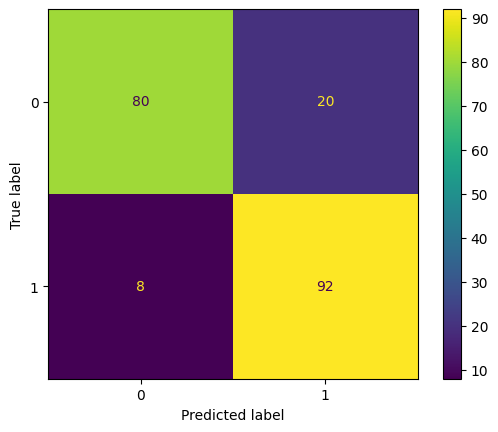

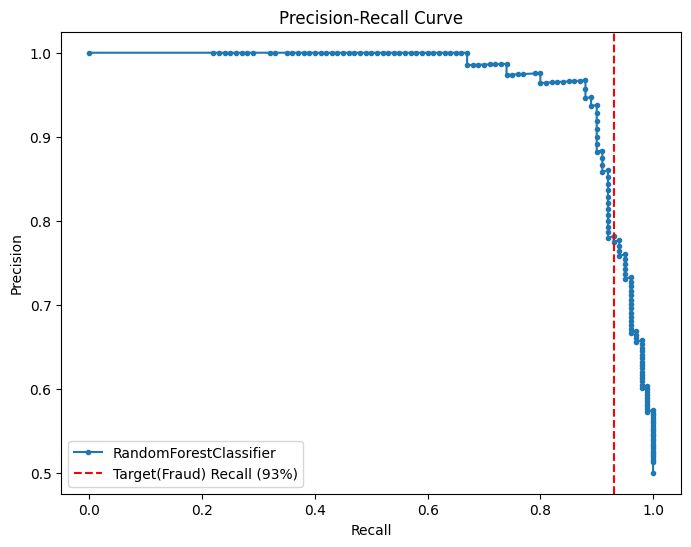

In [26]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_curve

# Example dataset (replace with your own data)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 50, 300, step=50)
    max_depth = trial.suggest_int("max_depth", 5, 50, step=5)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])

    # Create the model with suggested hyperparameters
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    # Train the model
    rf_model.fit(X_train, y_train)

    # Predict on validation set
    y_pred = rf_model.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create an Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # Adjust n_trials as needed

# Display the best hyperparameters
print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)

# Train the final model with the best hyperparameters
best_params = study.best_params
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Adjust decision threshold to increase recall
y_pred_prob = final_model.predict_proba(X_test)[:, 1]

# Find best threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
threshold = 0.3
y_pred = (y_pred_prob > threshold).astype(int)

# Evaluate model performance
#print("Confusion Matrix:")
#print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label="RandomForestClassifier")
plt.axvline(x=0.93, color='r', linestyle='--', label="Target(Fraud) Recall (93%)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

